# Final Project

## Part 1: Data description

For my final project I chose **Iris dataset** which is a dataset of iris plant. The dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. It contains 5 attributes including the class attribute as follow:

4 numeric predictive attributes:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm

The class names are:
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

There is no missing attribute in the dataset

The dataset is available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Abalone)

In [1]:
import csv
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
# Loading and reading hepatitis dataset
f = open("iris.csv")
reader = csv.reader(f, delimiter = ',')

In [3]:
dataset = []

# I define a header myself since the dataset only contains raw numbers 
header = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'irisClass']

# As the dataset numeric attributes are in string type, I first format them into float type

for line in reader:
    d = dict(zip(header, line))
    d['sepalLength'] = float(d['sepalLength'])
    d['sepalWidth'] = float(d['sepalWidth'])
    d['petalLength'] = float(d['petalLength'])
    d['petalWidth'] = float(d['petalWidth'])
    dataset.append(d)

In [4]:
# See the first entree
dataset[0]

{'sepalLength': 5.1,
 'sepalWidth': 3.5,
 'petalLength': 1.4,
 'petalWidth': 0.2,
 'irisClass': 'Iris-setosa'}

## Part 2: Simple statistics 

In [5]:
# Number of entries in the dataset
N = len(dataset) 
N

150

In [6]:
# Average value of each attributes and standard deviation

sepalLengths = [ d['sepalLength'] for d in dataset ] 
sepalWidths = [ d['sepalWidth'] for d in dataset ]
petalLengths = [ d['petalLength'] for d in dataset ]
petalWidths = [d['petalWidth'] for d in dataset ]

features = np.stack([sepalLengths, sepalWidths, petalLengths, petalWidths])

means = np.mean(features, axis = 1)

avsepalLength = means[0]
avsepalWidth = means[1]
avpetalLength = means[2]
avpetalWidth = means[3]

print('The average sepal length is {:.2f}'.format(avsepalLength))
print('The average sepal width is {:.2f}'.format(avsepalWidth))
print('The average petal length is {:.2f}'.format(avpetalLength))
print('The average petal width is {:.2f}'.format(avpetalWidth))

The average sepal length is 5.84
The average sepal width is 3.05
The average petal length is 3.76
The average petal width is 1.20


In [7]:
# Minimum and maximum values of each feature
mins = np.min(features, axis = 1)
maxs = np.max(features, axis = 1)

print("The minimum of sepal length is {} and the maximum is {}".format(mins[0], maxs[0]))
print("The minimum of sepal width is {} and the maximum is {}".format(mins[1], maxs[1]))
print("The minimum of petal length is {} and the maximum is {}".format(mins[2], maxs[2]))
print("The minimum of petal width is {} and the maximum is {}".format(mins[3], maxs[3]))

The minimum of sepal length is 4.3 and the maximum is 7.9
The minimum of sepal width is 2.0 and the maximum is 4.4
The minimum of petal length is 1.0 and the maximum is 6.9
The minimum of petal width is 0.1 and the maximum is 2.5


In [8]:
# Which class of iris has the longest sepal?

datasetSorted = sorted(dataset, key = lambda k: k['sepalLength'])
datasetSorted[-1]['irisClass']

'Iris-virginica'

In [9]:
# Which class of iris has the longest petal?

datasetSorted = sorted(dataset, key = lambda k: k['petalLength'])
datasetSorted[-1]['irisClass']

'Iris-virginica'

## Part 3: Data visualization

### Histogram and box plots

In [10]:
# Distribution of sepal and petal length

sepalLengthsCounts = defaultdict(int)
petalLengthsCounts = defaultdict(int)

for d in dataset:
    sepalLengthsCounts[d['sepalLength']]+=1
    petalLengthsCounts[d['petalLength']]+=1
    


In [11]:
sepalLength_freq = []
petalLength_freq = []

for key in sepalLengthsCounts.keys():
    for i in range(0, sepalLengthsCounts.get(key)):
        sepalLength_freq.append(key)
        petalLength_freq.append(key)
        
for key in petalLengthsCounts.keys():
    for i in range(0, petalLengthsCounts.get(key)):
        petalLength_freq.append(key)

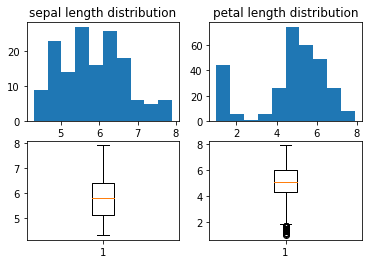

In [12]:
fix , axs = plt.subplots(2, 2)


axs[0, 0].hist(sepalLength_freq)
axs[0, 0].set_title('sepal length distribution')
axs[0, 1].hist(petalLength_freq)
axs[0, 1].set_title('petal length distribution')
axs[1, 0].boxplot(sepalLength_freq)
axs[1, 1].boxplot(petalLength_freq)

plt.show()

### Scatter plots

The correlation between sepal length and petal length is 0.87


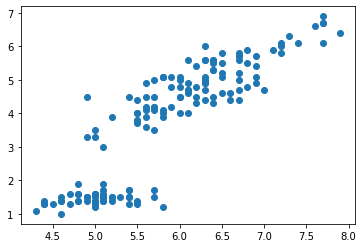

In [13]:
# Correlation between sepal and petal length

co_coef = scipy.stats.pearsonr(sepalLengths, petalLengths)[0]
print("The correlation between sepal length and petal length is {:.2f}".format(co_coef))

plt.scatter(sepalLengths, petalLengths)
plt.show()

This result show strong correlation between sepal length and petal length  

### Bar plots

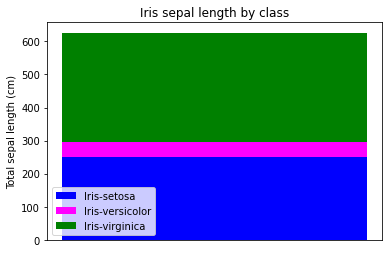

In [14]:
# Comparisons Between iris class

setosaSepalLength = sum([d['sepalLength'] for d in dataset if d['irisClass'] == 'Iris-setosa'])
versicolorSepalLength = sum([d['sepalLength'] for d in dataset if d['irisClass'] == 'Iris-versicolor'])
virginicaSepalLength = sum([d['sepalLength'] for d in dataset if d['irisClass'] == 'Iris-virginica'])

index = [1]

p1 = plt.bar(index, setosaSepalLength, color='blue')
p2 = plt.bar(index, versicolorSepalLength, bottom=setosaSepalLength, color='magenta')
p3 = plt.bar(index, virginicaSepalLength, bottom=versicolorSepalLength, color='green')
plt.gca().set(title='Iris sepal length by class', ylabel='Total sepal length (cm)');
plt.xticks([])

plt.legend((p1[0], p2[0], p3[0]), ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'))
plt.show()     